In [3]:
import wdlen
from new_childes import CHILDESCorpusReader
import slope
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
illegal = [['i1', 'jaak3', '哎', 'jaak3', 'wa3'],
 ['dau2', 'a3'],
 ['ji2', 'ji1喲'],
 ['eui1', 'waak6'],
 ['姐姐', '姐姐', 'a3', '姐姐', '姐'],
 ['a1', 'eui2'],
 ['我', 'jiu3'],
 ['oi1', 'a1'],
 ['哎', 'jaak3'],
 ['ai1', 'a1'],
 ['it1', 'ei1'],
 ['da1', 'dam3'],
 ['ji3', 'a3'],
 ['gap3', 'gap1', 'gap6'],
 ['gap3', 'gap1'],
 ['gau1', 'gau3'],
 ['A', 'B'],
 ['A', 'B', 'A'],
 ['gok1', 'go2', 'gok3'],
 ['機', '機機'],
 ['aap3', 'ba3', 'ba3', 'a1', 'a3', 'a1', 'ba3'],
 ['gaau2', 'ggaau2'],
 ['gok4', 'gok1'],
 ['mui4', 'm1'],
 ['dze4', 'dze1'],
 ['wou1', 'wou1', 'gau1'],
 ['wou4', 'gau1'],
 ['a3', 'keuk1', 'y4', 'dik1'],
 ['y4', 'dik1'],
 ['ai1', 'ai3', 'ai3'],
 ['gau3', 'gau1', 'go2', 'gou1', 'go3'],
 ['baak2', 'baak3'],
 ['sik6', 'sik1']]


In [5]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Chinese/')
LWL = CHILDESCorpusReader(corpus_root, 'LeeWongLeung/.*.xml')
#wdlen = wdlen.check(LWL, illegal)
#wdlen

In [6]:
wdlen_list = wdlen.wdlen_nc(LWL, illegal)

overall: 100%|██████████| 289/289 [01:25<00:00,  6.29it/s]


In [7]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

In [8]:
writer = pd.ExcelWriter('LeeWongLeung.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, style='.-', markevery=1, title='Population', figsize=(15,10), fontsize=12)
plt.show()

In [9]:
df['sum'] = df.loc[:, 'one':'five'].sum(axis = 1)

,fname,age,one,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,106,110,23,2,0,241
1,LeeWongLeung/0extra/ccc11100.xml,23,30,68,30,5,0,133
2,LeeWongLeung/0extra/ccc20923.xml,34,228,197,148,97,63,733
3,LeeWongLeung/0extra/ccc21013.xml,34,151,269,164,125,148,857
4,LeeWongLeung/0extra/ccc21027.xml,35,104,238,199,126,110,777
5,LeeWongLeung/0extra/cgk11101.xml,23,133,123,79,26,8,369
6,LeeWongLeung/0extra/cgk11108.xml,23,85,89,35,14,3,226
7,LeeWongLeung/0extra/cgk20818.xml,33,145,118,84,78,130,555
8,LeeWongLeung/0extra/cgk20909.xml,33,175,137,99,73,104,588
9,LeeWongLeung/0extra/ckt10522.xml,18,8,0,1,0,0,9


In [10]:
df_per = df

In [11]:
df_per.loc[:, "one":"five"] = df.loc[:,"one":"five"].div(df["sum"], axis=0)
df_per

,fname,age,one,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,0.439834,0.456432,0.095436,0.008299,0.000000,241
1,LeeWongLeung/0extra/ccc11100.xml,23,0.225564,0.511278,0.225564,0.037594,0.000000,133
2,LeeWongLeung/0extra/ccc20923.xml,34,0.311050,0.268759,0.201910,0.132333,0.085948,733
3,LeeWongLeung/0extra/ccc21013.xml,34,0.176196,0.313886,0.191365,0.145858,0.172695,857
4,LeeWongLeung/0extra/ccc21027.xml,35,0.133848,0.306306,0.256113,0.162162,0.141570,777
5,LeeWongLeung/0extra/cgk11101.xml,23,0.360434,0.333333,0.214092,0.070461,0.021680,369
6,LeeWongLeung/0extra/cgk11108.xml,23,0.376106,0.393805,0.154867,0.061947,0.013274,226
7,LeeWongLeung/0extra/cgk20818.xml,33,0.261261,0.212613,0.151351,0.140541,0.234234,555
8,LeeWongLeung/0extra/cgk20909.xml,33,0.297619,0.232993,0.168367,0.124150,0.176871,588
9,LeeWongLeung/0extra/ckt10522.xml,18,0.888889,0.000000,0.111111,0.000000,0.000000,9


In [12]:
df_per = df_per.drop(['sum'], axis = 1)

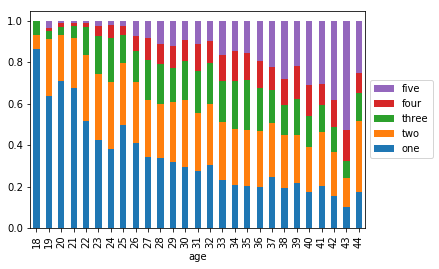

In [42]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## without one-word utterances

In [49]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Chinese/')
LWL = CHILDESCorpusReader(corpus_root, 'LeeWongLeung/.*.xml')
wdlen_list = wdlen.wdlen_no1(LWL)

AttributeError: 'list' object has no attribute 'wdlen_no1'

In [45]:
df_no1 = pd.DataFrame(wdlen).dropna()
df_no1 = df_no1[['fname', 'age', 'two','three', 'four', 'five']]
df_no1

,fname,age,two,three,four,five
0,LeeWongLeung/0extra/ccc11008.xml,22,111,26,11,3
1,LeeWongLeung/0extra/ccc11100.xml,23,65,26,11,5
2,LeeWongLeung/0extra/ccc20923.xml,34,178,185,97,70
3,LeeWongLeung/0extra/ccc21013.xml,34,229,203,126,169
4,LeeWongLeung/0extra/ccc21027.xml,35,231,212,126,110
5,LeeWongLeung/0extra/cgk11101.xml,23,118,83,31,8
6,LeeWongLeung/0extra/cgk11108.xml,23,86,41,15,3
7,LeeWongLeung/0extra/cgk20818.xml,33,119,96,80,133
8,LeeWongLeung/0extra/cgk20909.xml,33,136,106,76,104
9,LeeWongLeung/0extra/ckt10522.xml,18,1,1,0,0


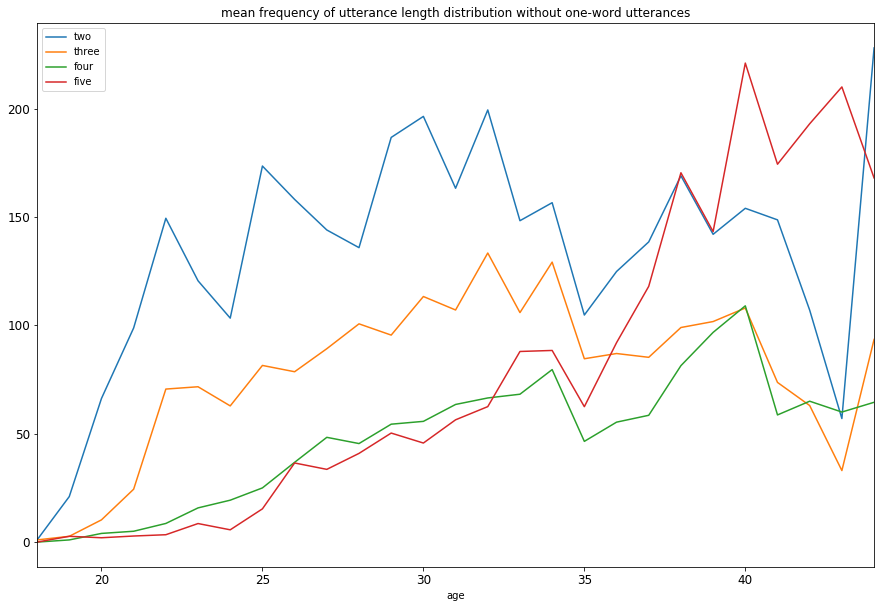

In [20]:
plt.figure()
df2_no1 = df_no1.groupby('age').mean().reset_index()
df2_no1.set_index('age').plot.line(rot=0, title='mean frequency of utterance length distribution without one-word utterances', figsize=(15,10), fontsize=12)
plt.show()

In [50]:
df_no1["sum"] = df_no1.loc[:, 'two':'five'].sum(axis=1)
df_no1

,fname,age,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,111,26,11,3,151
1,LeeWongLeung/0extra/ccc11100.xml,23,65,26,11,5,107
2,LeeWongLeung/0extra/ccc20923.xml,34,178,185,97,70,530
3,LeeWongLeung/0extra/ccc21013.xml,34,229,203,126,169,727
4,LeeWongLeung/0extra/ccc21027.xml,35,231,212,126,110,679
5,LeeWongLeung/0extra/cgk11101.xml,23,118,83,31,8,240
6,LeeWongLeung/0extra/cgk11108.xml,23,86,41,15,3,145
7,LeeWongLeung/0extra/cgk20818.xml,33,119,96,80,133,428
8,LeeWongLeung/0extra/cgk20909.xml,33,136,106,76,104,422
9,LeeWongLeung/0extra/ckt10522.xml,18,1,1,0,0,2


In [51]:
df_perno1 = df_no1
df_perno1.loc[:, 'two':'five'] = df_no1.loc[:,"two":"five"].div(df_no1["sum"], axis=0)
df_perno1

,fname,age,two,three,four,five,sum
0,LeeWongLeung/0extra/ccc11008.xml,22,0.735099,0.172185,0.072848,0.019868,151
1,LeeWongLeung/0extra/ccc11100.xml,23,0.607477,0.242991,0.102804,0.046729,107
2,LeeWongLeung/0extra/ccc20923.xml,34,0.335849,0.349057,0.183019,0.132075,530
3,LeeWongLeung/0extra/ccc21013.xml,34,0.314993,0.279230,0.173315,0.232462,727
4,LeeWongLeung/0extra/ccc21027.xml,35,0.340206,0.312224,0.185567,0.162003,679
5,LeeWongLeung/0extra/cgk11101.xml,23,0.491667,0.345833,0.129167,0.033333,240
6,LeeWongLeung/0extra/cgk11108.xml,23,0.593103,0.282759,0.103448,0.020690,145
7,LeeWongLeung/0extra/cgk20818.xml,33,0.278037,0.224299,0.186916,0.310748,428
8,LeeWongLeung/0extra/cgk20909.xml,33,0.322275,0.251185,0.180095,0.246445,422
9,LeeWongLeung/0extra/ckt10522.xml,18,0.500000,0.500000,0.000000,0.000000,2


In [52]:
df_perno1 = df_perno1.drop(['sum'], axis = 1)

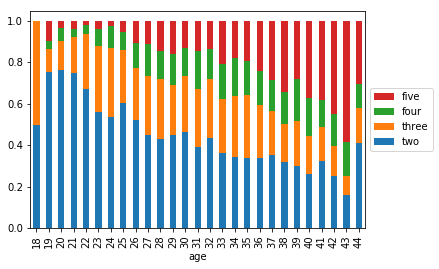

In [53]:
ax = df_perno1.groupby('age').mean().plot.bar(stacked = True, legend = 'reverse')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## After coelescing some of those ages

In [16]:
df_age = pd.read_excel('LeeWongLeung.xlsx')
#df_com = df.drop(['age.1'], axis = 1)

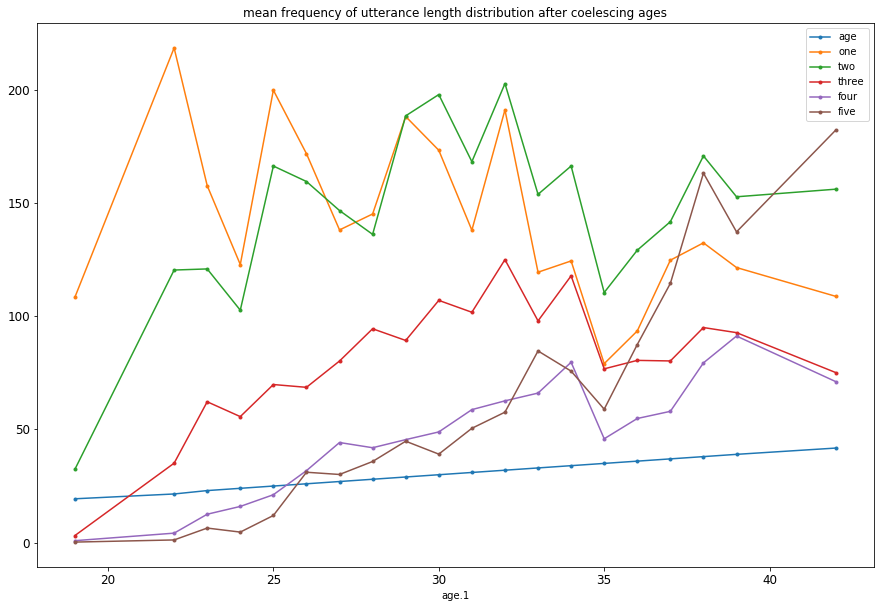

In [9]:
plt.figure()
df2_age = df_age.groupby('age.1').mean().reset_index()
df2_age.set_index('age.1').plot.line(rot=0, title='mean frequency of utterance length distribution after coelescing ages', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [49]:
df3_age = df_age.groupby('age.1').count()
df2_age = df_age.groupby('age').count()

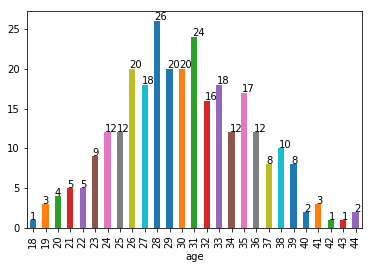

In [46]:
# Before coelescing ages
ax = df2_age['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

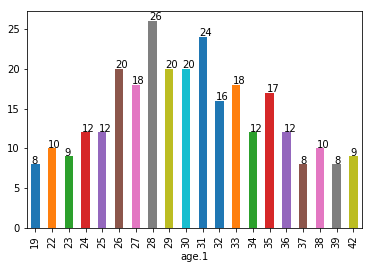

In [50]:
# After coelescing ages
ax = df3_age['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

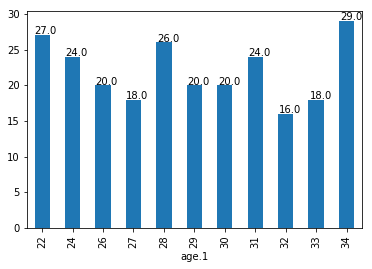

In [59]:
# After coelescing ages
ax = df3_age['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [18]:
df_age['sum'] = df_age.loc[:, 'one':'five'].sum(axis = 1)

In [19]:
df_age = df_age.drop('age', axis = 1)

In [12]:
df_perage = df_age
df_perage.loc[:, 'one':'five'] = df_age.loc[:, 'one':'five'].div(df_age['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

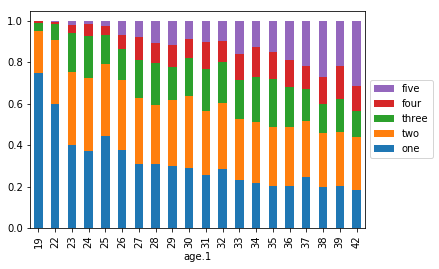

In [13]:
# wihtout aba
ax = df_perage.groupby('age.1').mean().plot.bar(legend = 'reverse', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

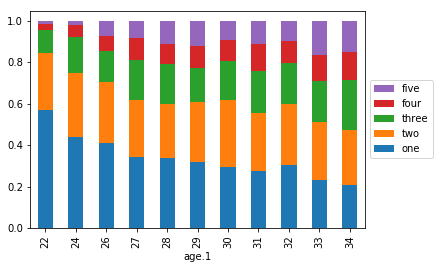

In [54]:
ax = df_perage.groupby('age.1').mean().plot.bar(legend = 'reverse', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

point:  [19.         23.04493001 42.        ]
F1:  541.9198028304389 F2:  57.23085167571622
F seg linear:  [48.54066625]


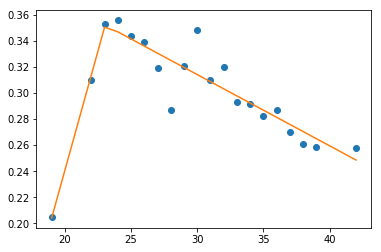

In [14]:
# without aba
df_mean1 = df_perage.groupby('age.1').mean()   #F(4, 20) = 16.93860219  p<.01
slope.seg_reg(df_mean1)

point:  [19.         23.00000009 42.        ]
F1:  73.68211841672873 F2:  23.302691604855305
F seg linear:  [16.93860219]


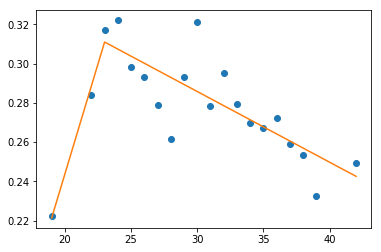

In [81]:
df_mean1 = df_perage.groupby('age.1').mean()   #F(4, 20) = 16.93860219  p<.01
slope.seg_reg(df_mean1)

In [82]:
df_perage['corpus'] = df_perage.fname.str[0:-10]

In [83]:
df_perage['corpus'] = df_perage['fname'].str.replace('0extra/', '')

In [84]:
df_perage['corpus'] = df_perage.corpus.str[13:16]

In [86]:
children = df_perage.corpus.unique()

point:  [19. 25. 31.]
F1:  9.754804819627934 F2:  0.4827847431029734
F seg linear:  [1.73650576]


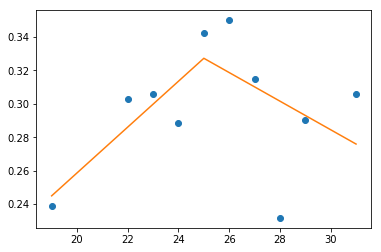

point:  [19.         29.27725861 32.        ]
F1:  20.5354923474385 F2:  0.3017956489968279
F seg linear:  [3.14659642]


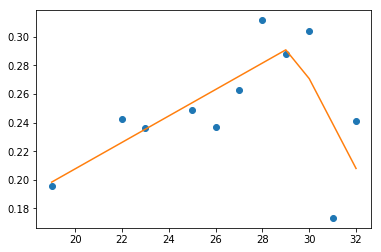

point:  [22.         34.39002217 35.        ]
F1:  26.87118157807314 F2:  -1.0
F seg linear:  [0.6202167]


D:\academy\two_word_stage\codes\slope.py:338: RankWarning: Polyfit may be poorly conditioned
  slope2, intercept2 = np.polyfit(xHat2, yHat2, 1)


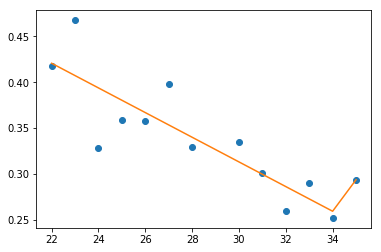

point:  [23. 28. 33.]
F1:  18.049795359354913 F2:  0.8511426959420193
F seg linear:  [5.99735547]


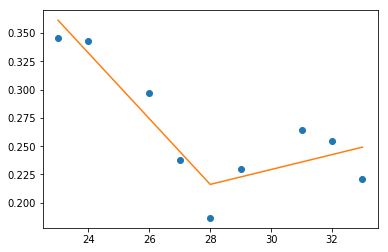

point:  [26.        26.0128808 42.       ]
F1:  -1.0 F2:  10.712668202597998
F seg linear:  [6.70804846]


D:\academy\two_word_stage\codes\slope.py:337: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)


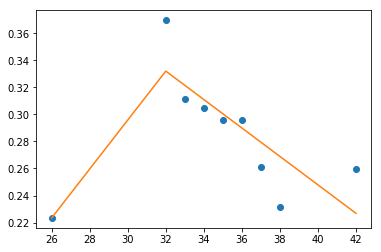

point:  [26.         38.59167039 39.        ]
F1:  0.5142699757411265 F2:  -1.0
F seg linear:  [6.86650395]


D:\academy\two_word_stage\codes\slope.py:338: RankWarning: Polyfit may be poorly conditioned
  slope2, intercept2 = np.polyfit(xHat2, yHat2, 1)


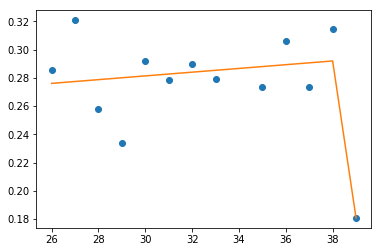

point:  [28.         28.79956336 42.        ]
F1:  -1.0 F2:  73.41876990574234
F seg linear:  [5.09253152]


D:\academy\two_word_stage\codes\slope.py:337: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)


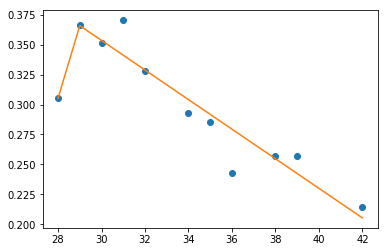

point:  [28.        32.3910461 39.       ]
F1:  1.3197226004248968 F2:  0.4227943569750326
F seg linear:  [1.27463567]


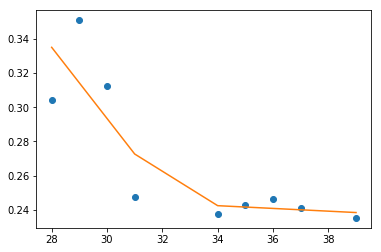

In [87]:
for child in children:
    slope.seg_reg_child(df_perage, child)

In [9]:
df_age = pd.read_excel('LeeWongLeung.xlsx').drop('age', axis = 1)

### two-five

In [20]:
df = pd.read_excel('LeeWongLeung.xlsx')
df_ageno1 = df_age.drop(['one'], axis = 1)

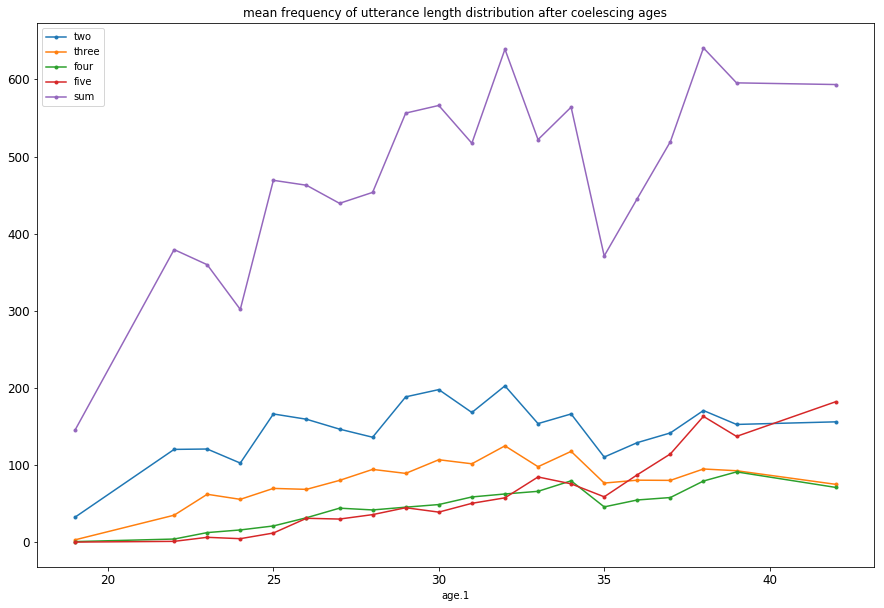

In [21]:
plt.figure()
df2_ageno1 = df_ageno1.groupby('age.1').mean().reset_index()
df2_ageno1.set_index('age.1').plot.line(rot=0, title='mean frequency of utterance length distribution after coelescing ages', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [22]:
df_ageno1['sum'] = df_ageno1.loc[:, 'two':'five'].sum(axis = 1)

In [23]:
df_perageno1 = df_ageno1
df_perageno1.loc[:, 'two':'five'] = df_ageno1.loc[:, 'two':'five'].div(df_ageno1['sum'], axis = 0)
df_perageno1 = df_perageno1.drop(['sum'], axis = 1)

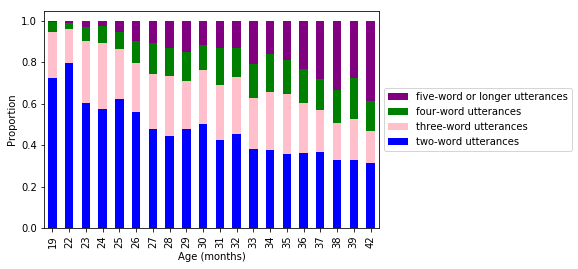

In [25]:
# without aba
ax = df_perageno1.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'blue', 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'two-word utterances', 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

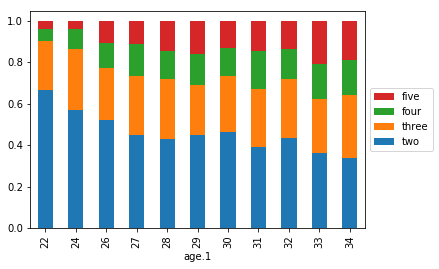

In [55]:
ax = df_perageno1.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'blue', 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'two-word utterances', 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

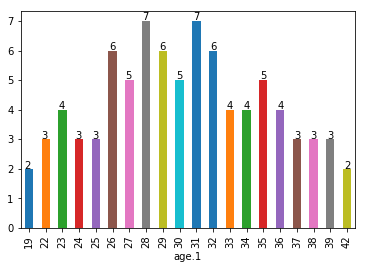

In [76]:
# see how many children are under each age.
ax = df_numchild['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

### three to five

In [10]:
df_ageno2 = df_age.drop(['one','two'], axis = 1)
df_ageno2['sum'] = df_ageno2.loc[:, 'three':'five'].sum(axis = 1)
df_perage = df_ageno2
df_perage.loc[:, 'three':'five'] = df_ageno2.loc[:, 'three':'five'].div(df_ageno2['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

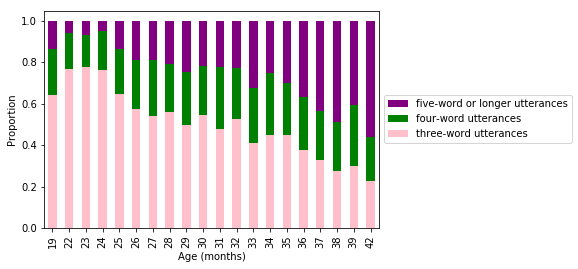

In [11]:
ax = df_perage.dropna().groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'pink', 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'three-word utterances', 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

### four to five

In [13]:
df_ageno3 = df_age.drop(['one','two', 'three'], axis = 1)
df_ageno3['sum'] = df_ageno3.loc[:, 'four':'five'].sum(axis = 1)
df_perage = df_ageno3
df_perage.loc[:, 'four':'five'] = df_ageno3.loc[:, 'four':'five'].div(df_ageno3['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

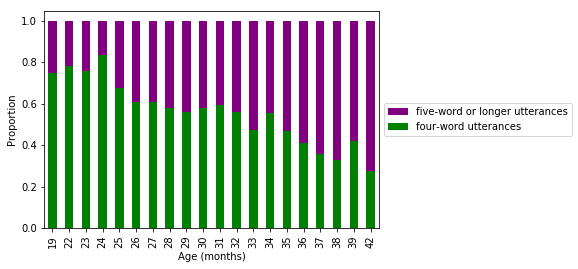

In [14]:
ax = df_perage.dropna().groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = [ 'green', 'purple'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'four-word utterances', 'five-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

### five

In [17]:
wdlen_five = wdlen.wdlen_five(LWL, illegal)
df = pd.DataFrame(wdlen_five).dropna()
df = df[['fname', 'age', 'five', 'six']]
writer = pd.ExcelWriter('LeeWongLeung_five.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

overall: 100%|██████████| 289/289 [01:41<00:00,  5.95it/s]


In [19]:
df_age = pd.read_excel('LeeWongLeung_five.xlsx')

In [20]:
df_ageno4 = df_age.drop('age', axis = 1)
df_ageno4['sum'] = df_ageno4.loc[:, 'five':'six'].sum(axis = 1)
df_perage = df_ageno4
df_perage.loc[:, 'five':'six'] = df_ageno4.loc[:, 'five':'six'].div(df_ageno4['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

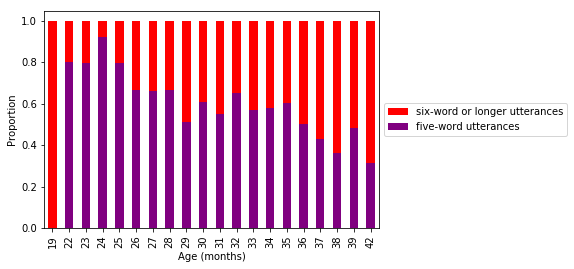

In [22]:
ax = df_perage.groupby('age.1').mean().plot.bar(stacked = True, legend = True, color = ['purple', 'red'])
handles, labels= ax.get_legend_handles_labels()
legend_name = [ 'five-word utterances', 'six-word or longer utterances']
ax.legend( reversed(handles), reversed(legend_name), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Age (months)')
ax.set_ylabel('Proportion')
plt.show()

## segmented regression

### two to five

In [26]:
df_mean = df_perageno1.groupby('age.1').mean()

point:  [19.         27.99999998 42.        ]
F1:  10.717734899098891 F2:  52.98310159270666
F seg linear:  [4.68785526]


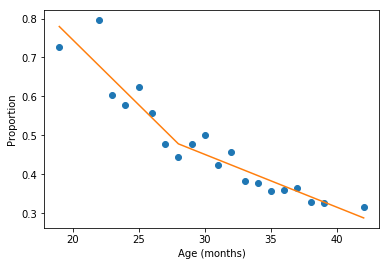

In [28]:
slope.seg_reg(df_mean, 2)  #F(2, 20) = 4.69, p < .05

### three to five

point:  [19.         19.19894627 42.        ]


D:\academy\two_word_stage\codes\slope.py:233: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)


F1:  -1.0 F2:  230.3539617625474
F seg linear:  [6.26900583]


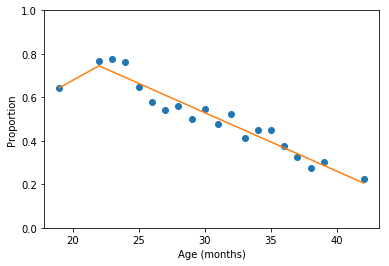

In [12]:
slope.seg_reg(df_perage.groupby('age.1').mean(), 2, 'three')  # cannot fit

### four to five

point:  [19.         19.51075398 42.        ]


D:\academy\two_word_stage\codes\slope.py:233: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)
D:\academy\two_word_stage\codes\slope.py:264: RuntimeWarning: invalid value encountered in double_scalars
  F1 = (ss1_mod / 1) / (ss1_res / (len(xHat1) - 2))


F1:  nan F2:  145.8424822765555
F seg linear:  [1.37371112]


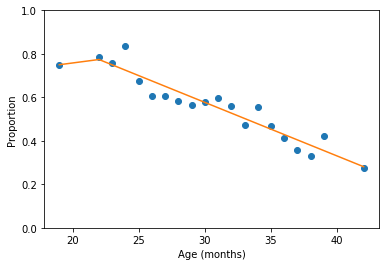

In [16]:
slope.seg_reg(df_perage.groupby('age.1').mean(), 2, 'four')  # cannot fit

### five

point:  [19.         22.10462319 42.        ]


D:\academy\two_word_stage\codes\slope.py:264: RuntimeWarning: divide by zero encountered in double_scalars
  F1 = (ss1_mod / 1) / (ss1_res / (len(xHat1) - 2))


F1:  0.0 F2:  62.17057106321585
F seg linear:  [61.09858387]


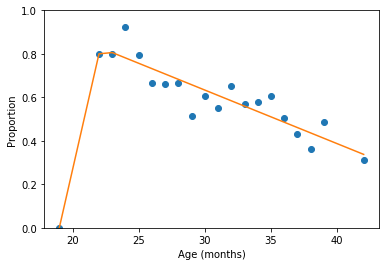

In [23]:
slope.seg_reg(df_perage.groupby('age.1').mean(), 2, 'five')  # cannot fit

## plot per child

In [6]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [23]:
df_perageno1['corpus'] = df_perageno1.fname.str[0:-10]

In [24]:
df_perageno1['corpus'] = df_perageno1['fname'].str.replace('0extra/', '')

In [25]:
df_perageno1['corpus'] = df_perageno1.corpus.str[13:16]

In [26]:
children = df_perageno1.corpus.unique()

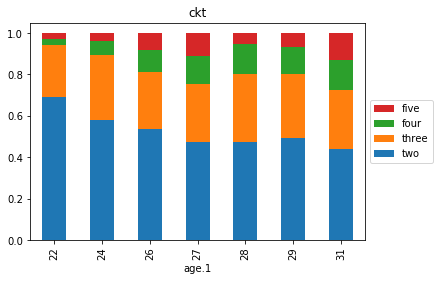

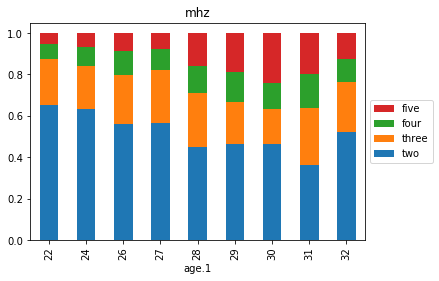

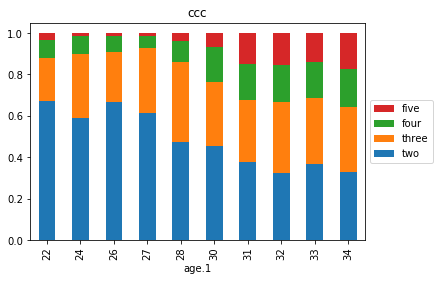

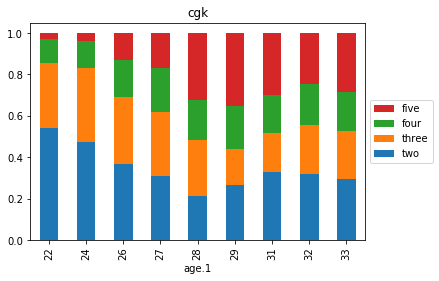

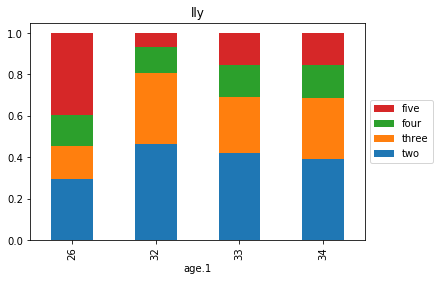

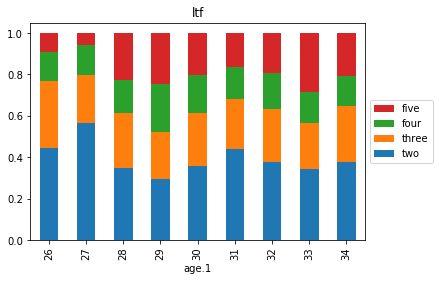

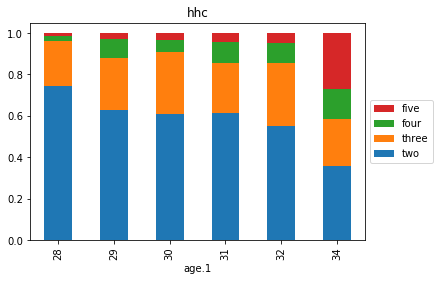

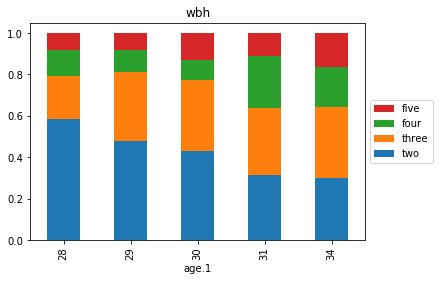

In [22]:
for child in children:   #  can't read Tai's data??
    per_child(df_perageno1, child, 'age.1')

point:  [19.         19.00021007 31.        ]
F1:  -1.0 F2:  31.602090675066822
F seg linear:  [0.56340915]


D:\academy\two_word_stage\codes\slope.py:337: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)


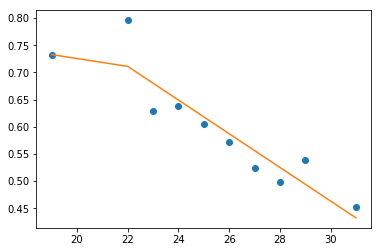

point:  [19.         31.32687225 32.        ]
F1:  22.03657134067698 F2:  -1.0
F seg linear:  [1.19507561]


D:\academy\two_word_stage\codes\slope.py:338: RankWarning: Polyfit may be poorly conditioned
  slope2, intercept2 = np.polyfit(xHat2, yHat2, 1)


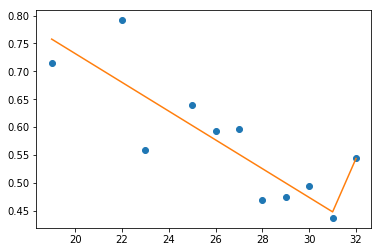

point:  [22.         31.99999999 35.        ]
F1:  34.2872076057584 F2:  0.13590374246816658
F seg linear:  [1.24524087]


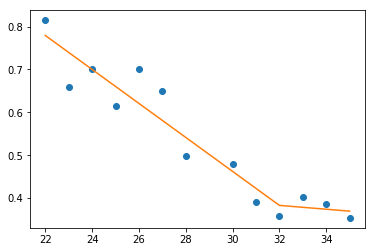

point:  [23.         27.99999983 33.        ]
F1:  105.42820523494991 F2:  3.086604949090743
F seg linear:  [19.87078825]


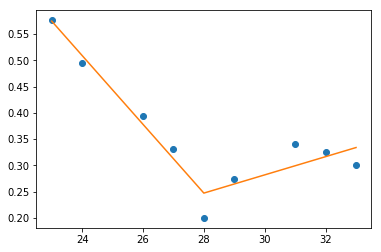

point:  [26.         26.01902407 42.        ]
F1:  -1.0 F2:  11.321754607256302
F seg linear:  [5.0257069]


D:\academy\two_word_stage\codes\slope.py:337: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)


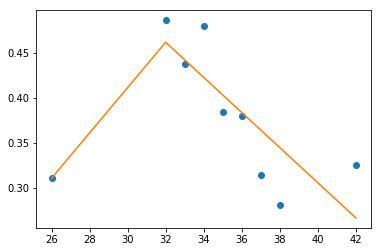

point:  [26.         28.70907507 39.        ]
F1:  1.0068450544891667 F2:  0.10920543343541954
F seg linear:  [1.95043488]


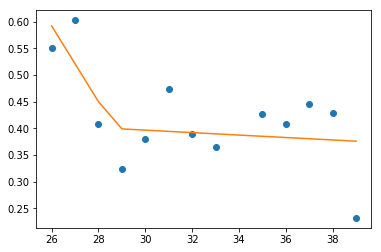

point:  [28.         34.15857395 42.        ]
F1:  16.905665580931664 F2:  6.075067814598474
F seg linear:  [3.4833722]


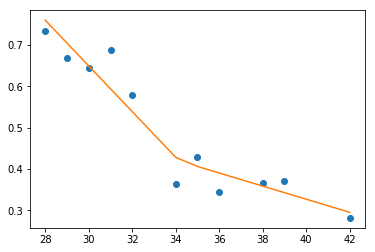

point:  [28.         32.05344476 39.        ]
F1:  9.102362070609022 F2:  0.20597237395787302
F seg linear:  [6.52082857]


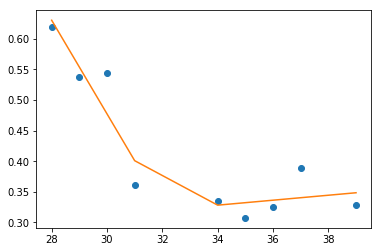

In [27]:
# without aba
for child in children:
    slope.seg_reg_child(df_perageno1, child)

point:  [22.         26.99999987 31.        ]
F1:  15.199707416640585 F2:  1.1389566314162614
F seg linear:  [3.60306827]


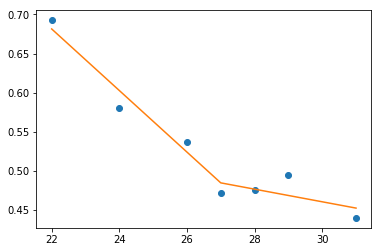

point:  [22.         31.09479999 32.        ]
F1:  53.2772679909286 F2:  -1.0
F seg linear:  [5.81835347]


D:\academy\two_word_stage\codes\slope.py:338: RankWarning: Polyfit may be poorly conditioned
  slope2, intercept2 = np.polyfit(xHat2, yHat2, 1)


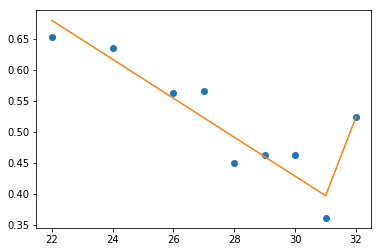

point:  [22.         25.99999999 34.        ]
F1:  0.0 F2:  41.08806664764099
F seg linear:  [1.31497065]


D:\academy\two_word_stage\codes\slope.py:368: RuntimeWarning: divide by zero encountered in double_scalars
  F1 = (ss1_mod / 1) / (ss1_res / (len(xHat1) - 2))


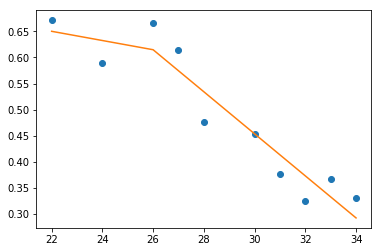

point:  [22. 28. 33.]
F1:  87.30779107517012 F2:  3.3460690965716124
F seg linear:  [20.58613097]


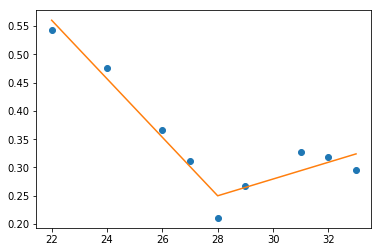

point:  [26.         26.05328392 34.        ]
F1:  -1.0 F2:  241.26617385106505
F seg linear:  [0.]


D:\academy\two_word_stage\codes\slope.py:337: RankWarning: Polyfit may be poorly conditioned
  slope1, intercept1 = np.polyfit(xHat1, yHat1, 1)
D:\academy\two_word_stage\codes\slope.py:398: RuntimeWarning: divide by zero encountered in double_scalars
  b = ss_res / (len(age_list) - 4)


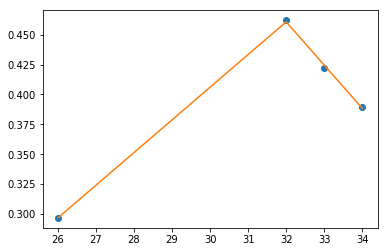

point:  [26. 29. 34.]
F1:  0.2767647659037578 F2:  0.4436861926109418
F seg linear:  [1.00815378]


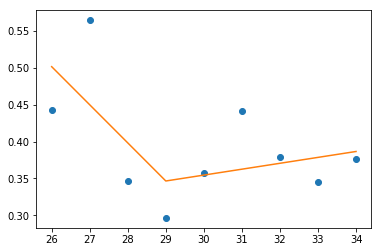

point:  [28.         31.99388656 34.        ]
F1:  4.218517839480047 F2:  0.0
F seg linear:  [1.09157148]


D:\academy\two_word_stage\codes\slope.py:369: RuntimeWarning: divide by zero encountered in double_scalars
  F2 = (ss2_mod / 1) / (ss2_res / (len(xHat2) - 2))


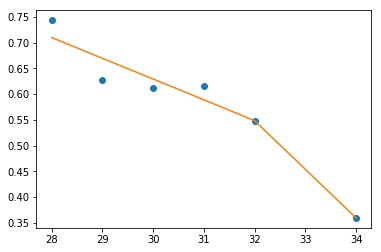

point:  [28.        32.1277764 34.       ]
F1:  83.07445480267681 F2:  -1.0
F seg linear:  [5.89286169]


D:\academy\two_word_stage\codes\slope.py:338: RankWarning: Polyfit may be poorly conditioned
  slope2, intercept2 = np.polyfit(xHat2, yHat2, 1)


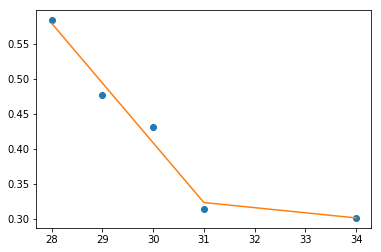

In [17]:
for child in children:
    slope.seg_reg_child(df_perageno1, child)

## Adult

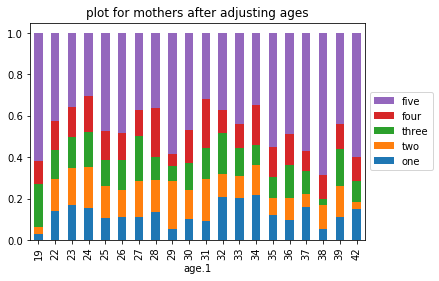

In [27]:
df_mother = pd.read_excel('LeeWongLeung_mother.xlsx')
df_mother['sum'] = df_mother.loc[:, 'one':'five'].sum(axis = 1)
df_motherper = df_mother
df_motherper.loc[:, 'one':'five'] = df_mother.loc[:, 'one':'five'].div(df_mother['sum'], axis = 0)
df_motherper = df_motherper.drop(['sum', 'age'], axis = 1)
ax = df_motherper.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'plot for mothers after adjusting ages')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()